In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importando a biblioteca warnings para ignorar avisos durante a execução do código
import warnings
warnings.filterwarnings("ignore")

In [32]:
df = pd.read_excel('Dados/Fonte dos Dados.xlsx')

In [33]:
df.head()

,nomeLocalidade,estado,População residente,Densidade demográfica,Porcentagem de Jovens,Porcentagem de Ativos,Porcentagem de Idosos,Taxa de Urbanização,Taxa de Saneamento Básico,Ativos com Baixo Nível Educacional,...,Percentual de trabalhadores do setor secundário em relação ao total,Percentual de trabalhadores do setor terciário em relação ao total,Média Salarial,Produtividade,Taxa de desemprego dos jovens,Taxa de desemprego,"Número de trabalhadores(Comerciais, hotéis e restaurantes) por 1,000 habitantes","Número de ativos culturais e de lazer por 10,000 habitantes",Produtividade_bin,Cluster
0,Acrelândia,Acre,12538,6.93,52.92,43.04,4.04,48.34,0.00,75.34,...,21.53,34.07,994.67,2654247.23,19.17,9.62,12.12,0.0,4,Cluster 0
1,Assis Brasil,Acre,6072,1.22,55.58,40.07,4.35,65.30,2.39,66.83,...,0.00,36.25,1163.49,2113108.99,10.57,7.44,17.79,0.0,3,Cluster 0
2,Brasiléia,Acre,21398,5.46,51.88,42.76,5.37,70.02,21.27,70.67,...,17.70,33.83,818.65,2376384.22,11.13,5.96,14.58,0.0,3,Cluster 0
3,Bujari,Acre,8471,2.79,52.71,42.60,4.69,44.07,0.16,71.05,...,1.04,29.40,897.30,2668575.85,9.76,3.41,5.78,0.0,4,Cluster 0
4,Capixaba,Acre,8798,5.17,53.92,41.92,4.16,44.60,0.82,77.90,...,30.37,10.32,843.49,2803488.37,6.35,4.14,7.73,0.0,4,Cluster 0


In [34]:
from pycaret.clustering import *
s = setup(df, ignore_features=['nomeLocalidade','estado', 'Cluster'])

In [35]:
# import ClusteringExperiment and init the class
from pycaret.clustering import ClusteringExperiment
exp = ClusteringExperiment()

In [36]:
# check the type of exp
type(exp)

pycaret.clustering.oop.ClusteringExperiment

In [37]:
# init setup on exp
exp.setup(df, ignore_features=['nomeLocalidade','estado', 'Cluster'])

In [38]:
# train kmeans model
kmeans = create_model('kmeans', num_clusters = 5)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:26:13
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9517,56268.6257,0.2983,0,0,0


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9517,56268.6257,0.2983,0,0,0


In [39]:
# to check all the available models
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [40]:
kmeans_cluster = assign_model(kmeans)
kmeans_cluster.head()

,População residente,Densidade demográfica,Porcentagem de Jovens,Porcentagem de Ativos,Porcentagem de Idosos,Taxa de Urbanização,Taxa de Saneamento Básico,Ativos com Baixo Nível Educacional,Ativos com Médio Nível Educacional,Ativos com Alto Nível Educacional,...,Percentual de trabalhadores do setor secundário em relação ao total,Percentual de trabalhadores do setor terciário em relação ao total,Média Salarial,Produtividade,Taxa de desemprego dos jovens,Taxa de desemprego,"Número de trabalhadores(Comerciais, hotéis e restaurantes) por 1,000 habitantes","Número de ativos culturais e de lazer por 10,000 habitantes",Produtividade_bin,Cluster
0,12538,6.93,52.919998,43.040001,4.04,48.340000,0.00,75.339996,19.520000,5.14,...,21.530001,34.070000,994.669983,2654247.25,19.17,9.62,12.120000,0.0,4,Cluster 0
1,6072,1.22,55.580002,40.070000,4.35,65.300003,2.39,66.830002,26.930000,6.23,...,0.000000,36.250000,1163.489990,2113109.00,10.57,7.44,17.790001,0.0,3,Cluster 0
2,21398,5.46,51.880001,42.759998,5.37,70.019997,21.27,70.669998,21.290001,8.04,...,17.700001,33.830002,818.650024,2376384.25,11.13,5.96,14.580000,0.0,3,Cluster 0
3,8471,2.79,52.709999,42.599998,4.69,44.070000,0.16,71.050003,22.049999,6.90,...,1.040000,29.400000,897.299988,2668575.75,9.76,3.41,5.780000,0.0,4,Cluster 0
4,8798,5.17,53.919998,41.919998,4.16,44.599998,0.82,77.900002,16.600000,5.49,...,30.370001,10.320000,843.489990,2803488.25,6.35,4.14,7.730000,0.0,4,Cluster 0


In [41]:
# predict on test set
kmeans_pred = predict_model(kmeans, data=df)
kmeans_pred.head()

,População residente,Densidade demográfica,Porcentagem de Jovens,Porcentagem de Ativos,Porcentagem de Idosos,Taxa de Urbanização,Taxa de Saneamento Básico,Ativos com Baixo Nível Educacional,Ativos com Médio Nível Educacional,Ativos com Alto Nível Educacional,...,Percentual de trabalhadores do setor secundário em relação ao total,Percentual de trabalhadores do setor terciário em relação ao total,Média Salarial,Produtividade,Taxa de desemprego dos jovens,Taxa de desemprego,"Número de trabalhadores(Comerciais, hotéis e restaurantes) por 1,000 habitantes","Número de ativos culturais e de lazer por 10,000 habitantes",Produtividade_bin,Cluster
0,12538.0,6.93,52.919998,43.040001,4.04,48.340000,0.00,75.339996,19.520000,5.14,...,21.530001,34.070000,994.669983,2654247.25,19.17,9.62,12.120000,0.0,4.0,Cluster 0
1,6072.0,1.22,55.580002,40.070000,4.35,65.300003,2.39,66.830002,26.930000,6.23,...,0.000000,36.250000,1163.489990,2113109.00,10.57,7.44,17.790001,0.0,3.0,Cluster 0
2,21398.0,5.46,51.880001,42.759998,5.37,70.019997,21.27,70.669998,21.290001,8.04,...,17.700001,33.830002,818.650024,2376384.25,11.13,5.96,14.580000,0.0,3.0,Cluster 0
3,8471.0,2.79,52.709999,42.599998,4.69,44.070000,0.16,71.050003,22.049999,6.90,...,1.040000,29.400000,897.299988,2668575.75,9.76,3.41,5.780000,0.0,4.0,Cluster 0
4,8798.0,5.17,53.919998,41.919998,4.16,44.599998,0.82,77.900002,16.600000,5.49,...,30.370001,10.320000,843.489990,2803488.25,6.35,4.14,7.730000,0.0,4.0,Cluster 0


In [42]:
kmeans_pred.to_excel('Dados/Cluster.xlsx')

In [43]:
# plot pca cluster plot 
plot_model(kmeans, plot = 'cluster')

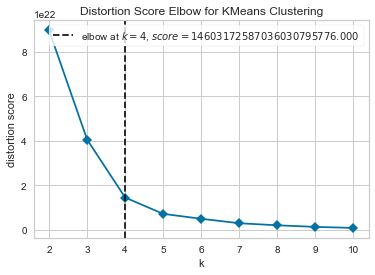

In [44]:
# plot elbow
plot_model(kmeans, plot = 'elbow')

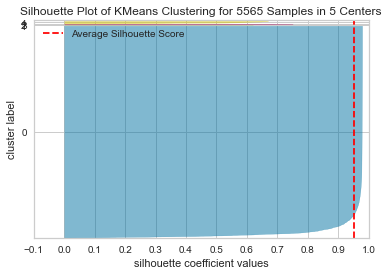

In [45]:
# plot silhouette
plot_model(kmeans, plot = 'silhouette')

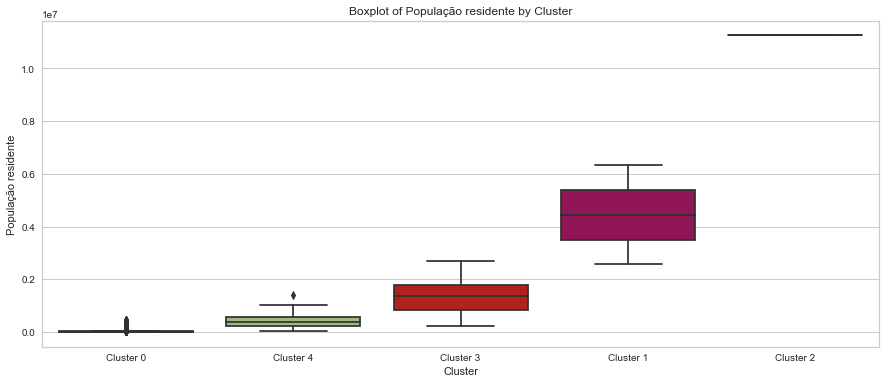

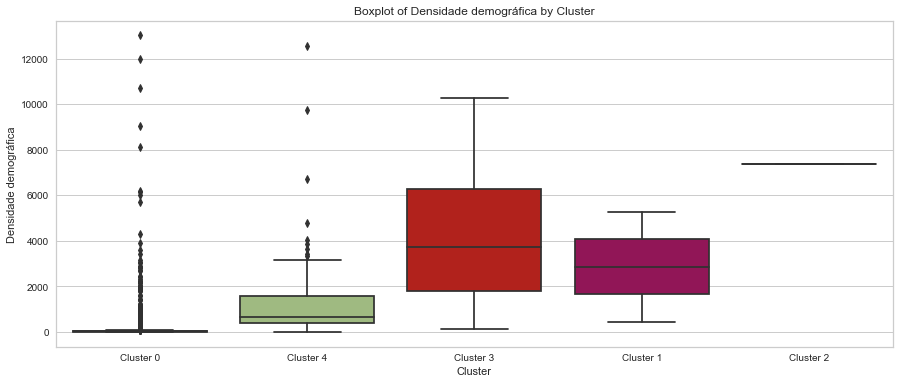

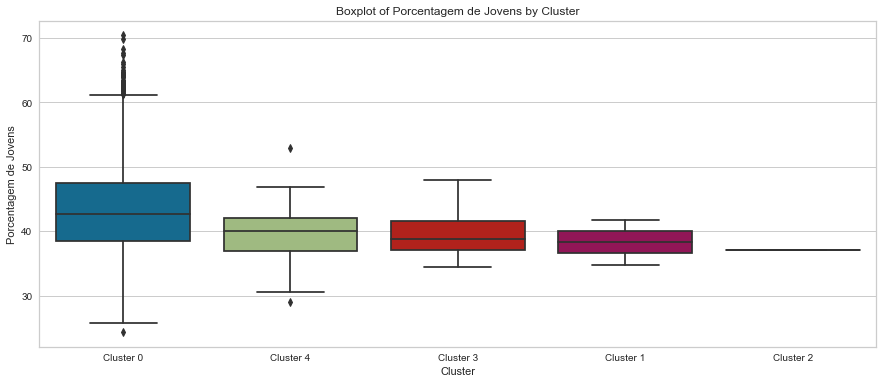

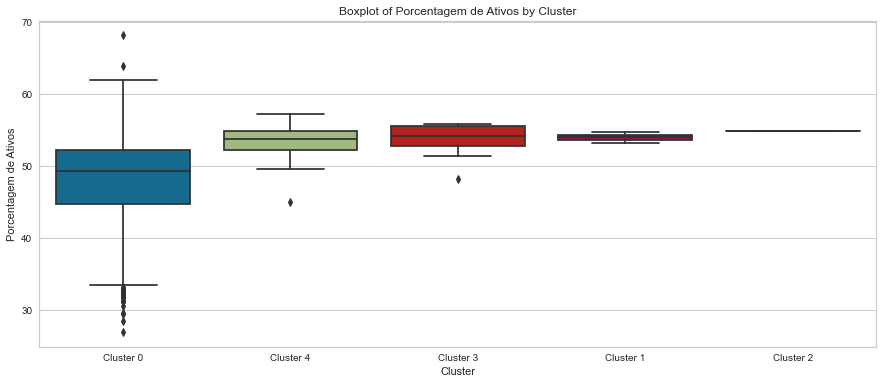

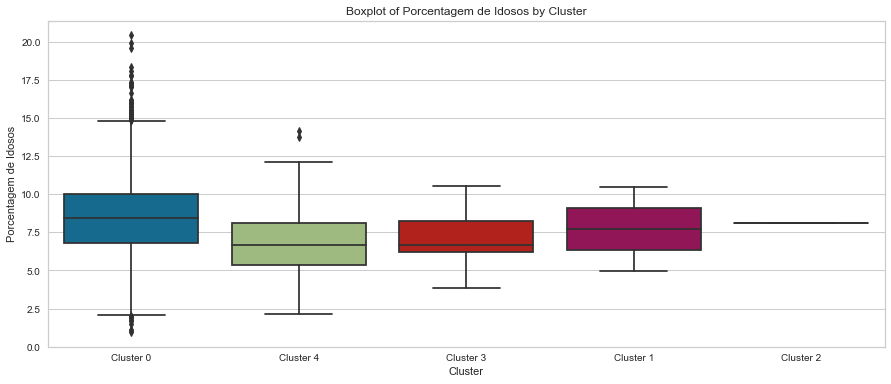

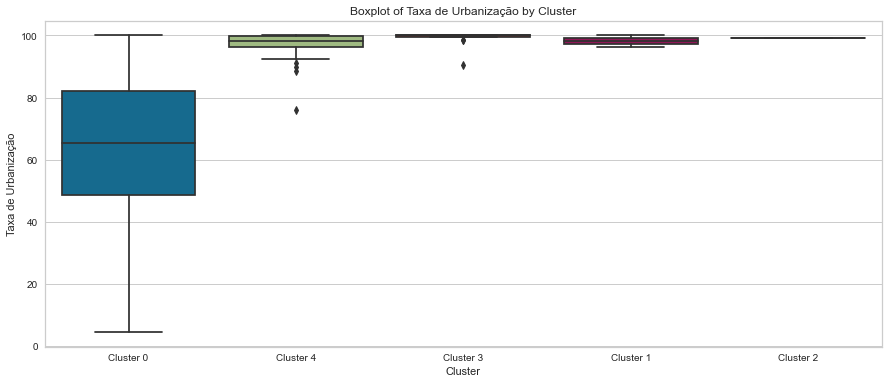

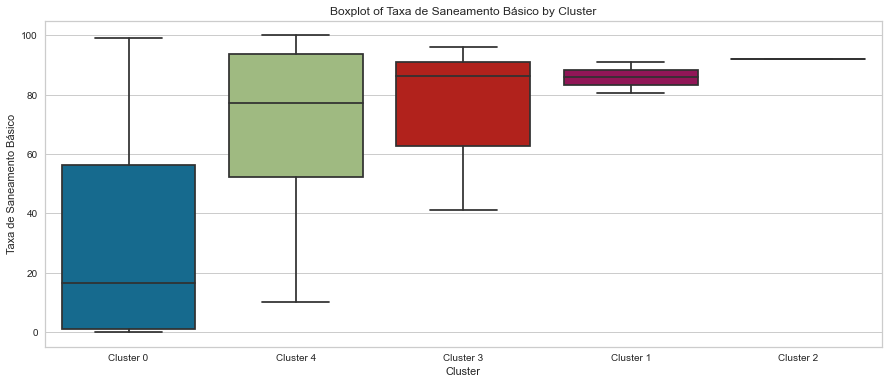

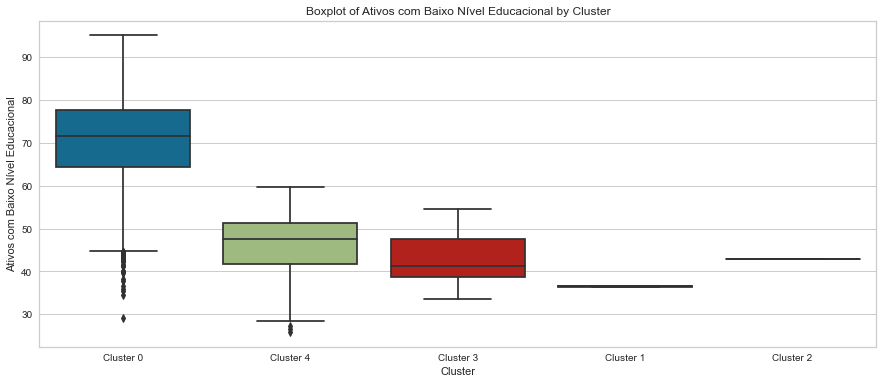

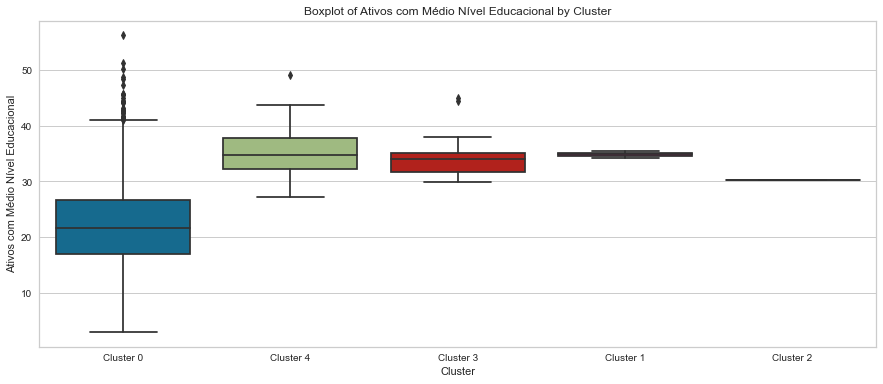

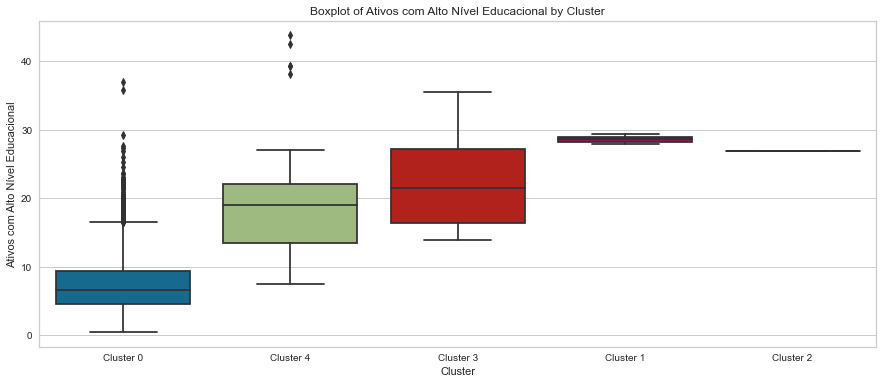

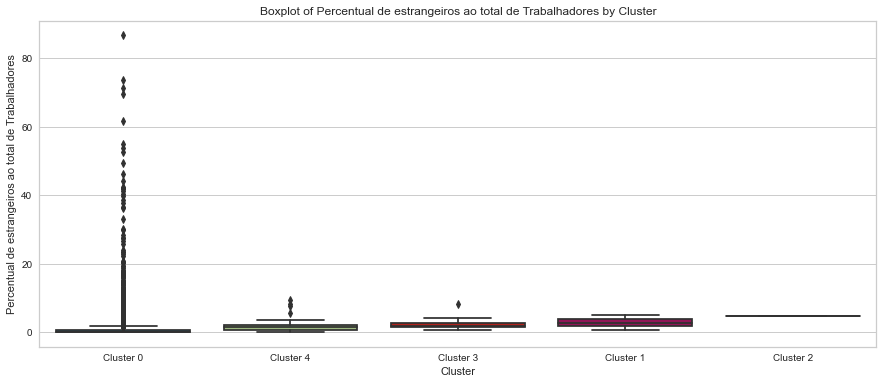

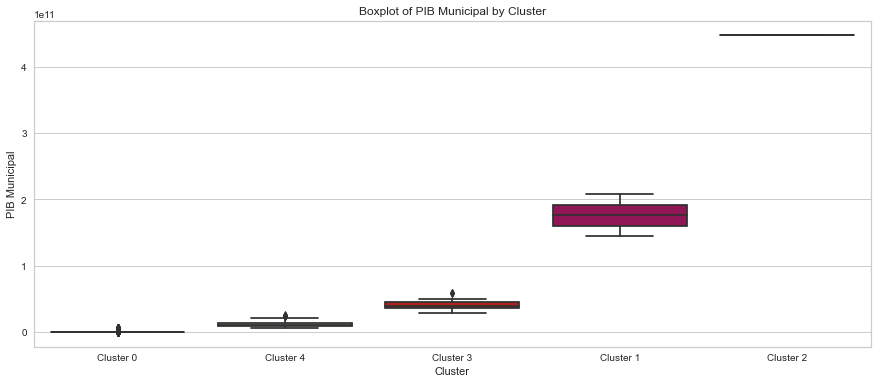

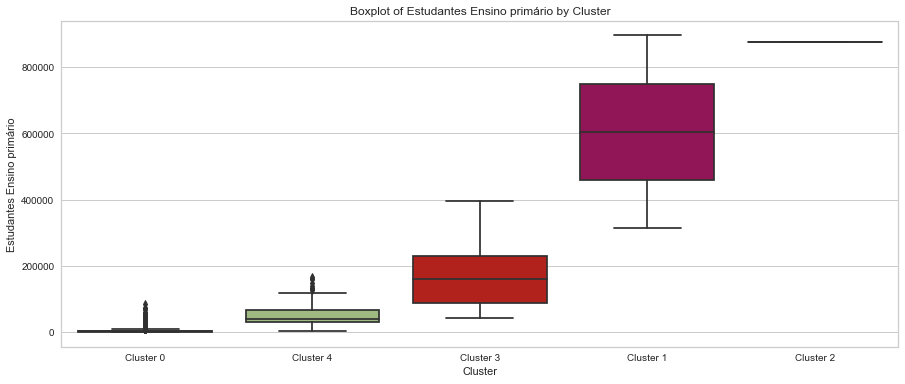

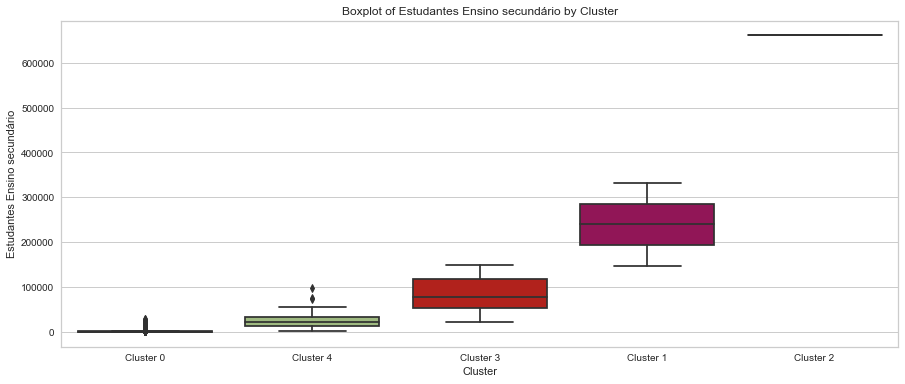

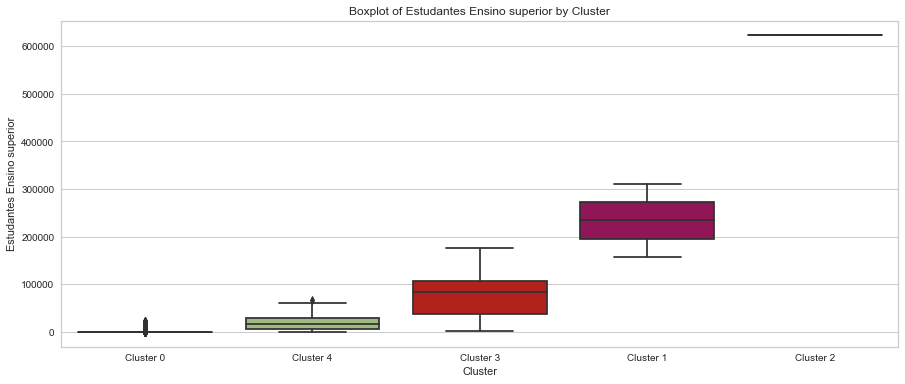

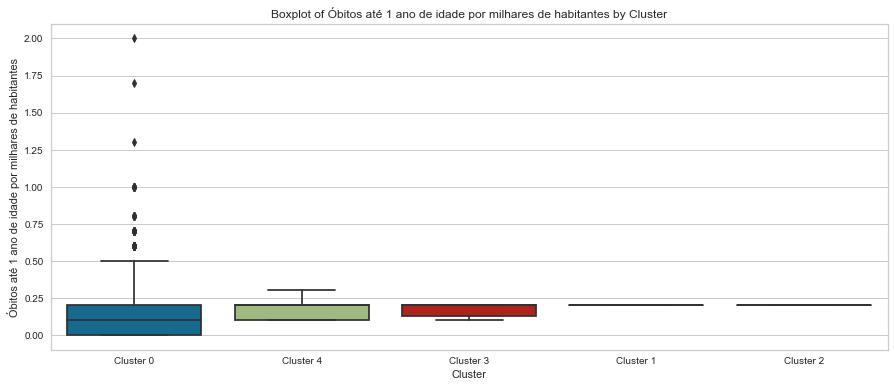

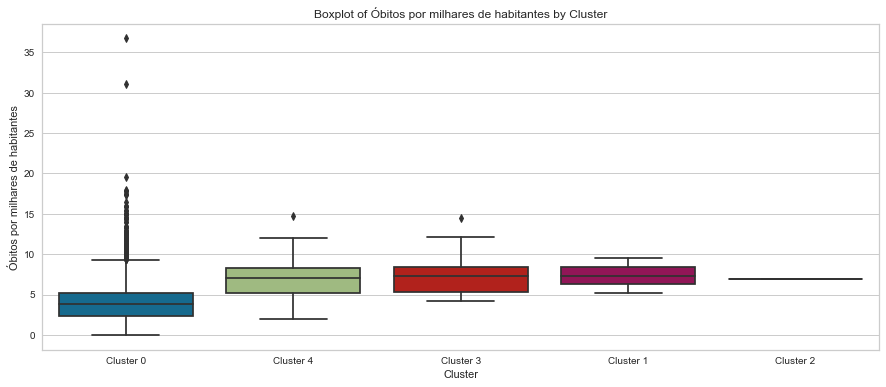

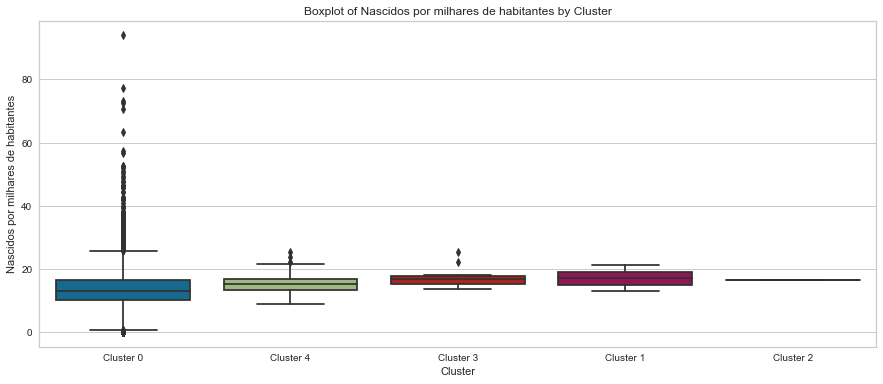

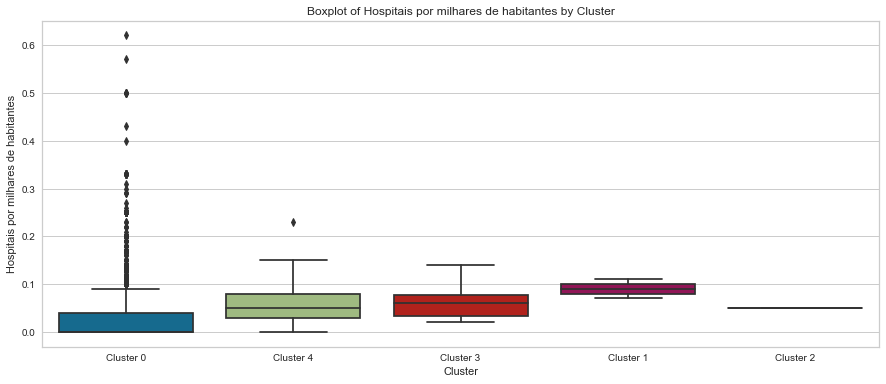

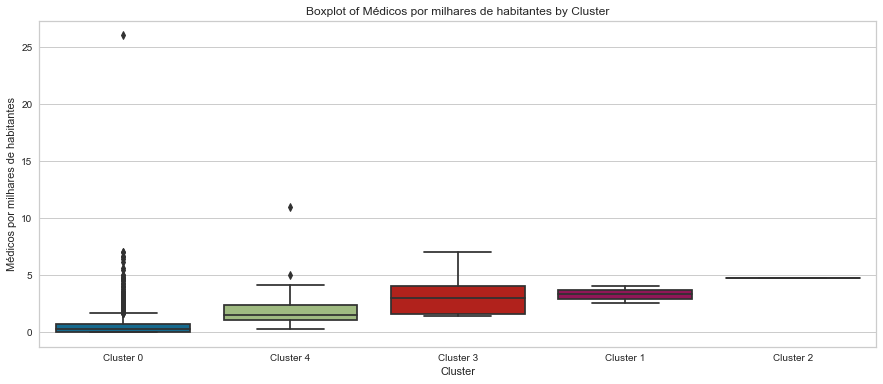

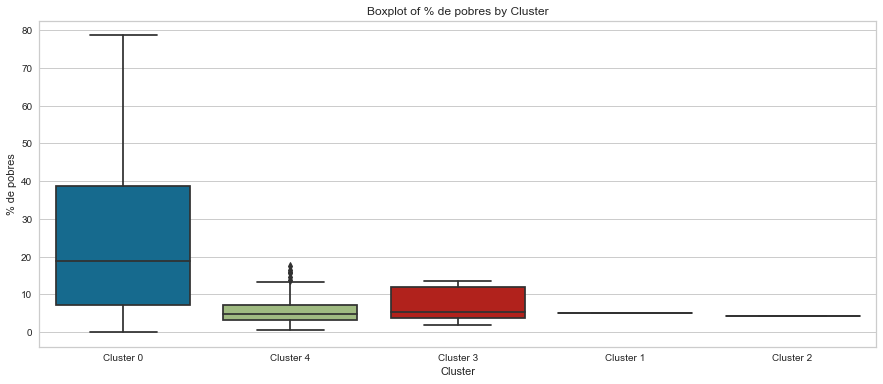

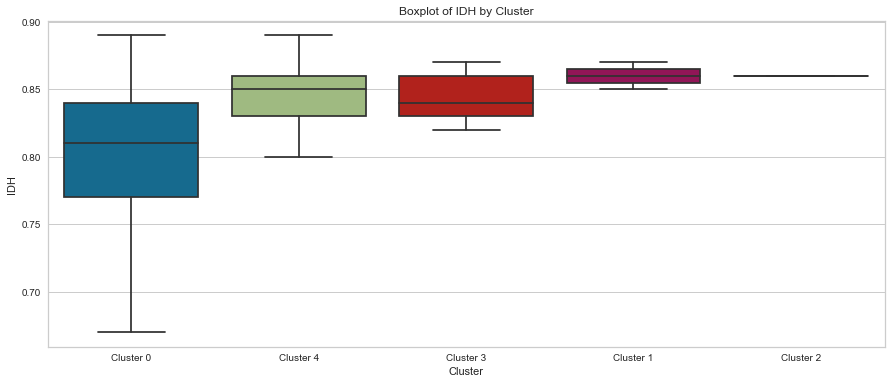

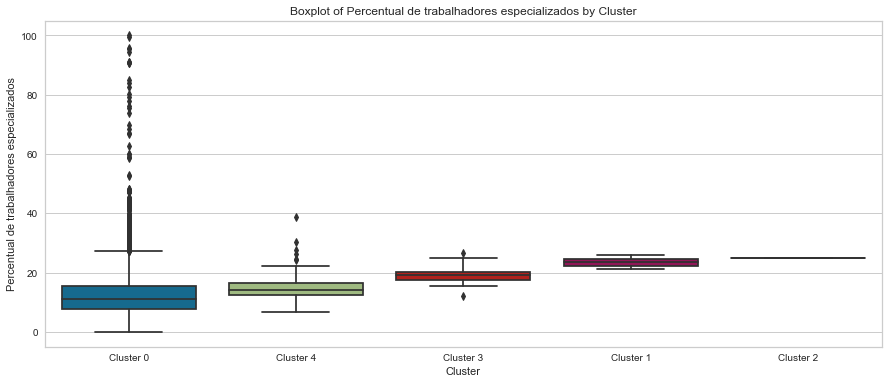

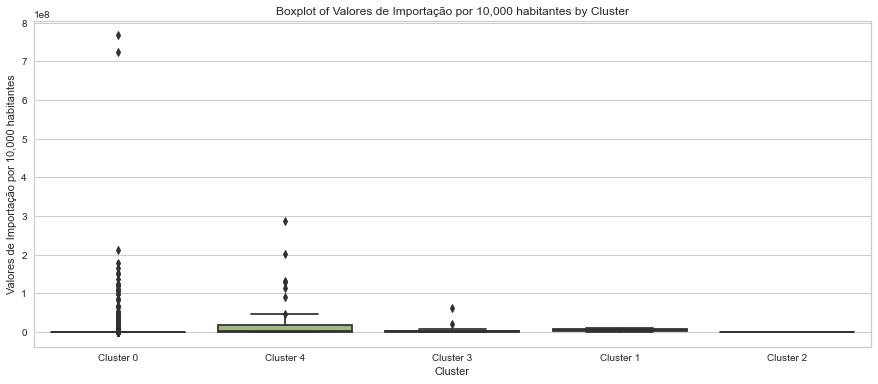

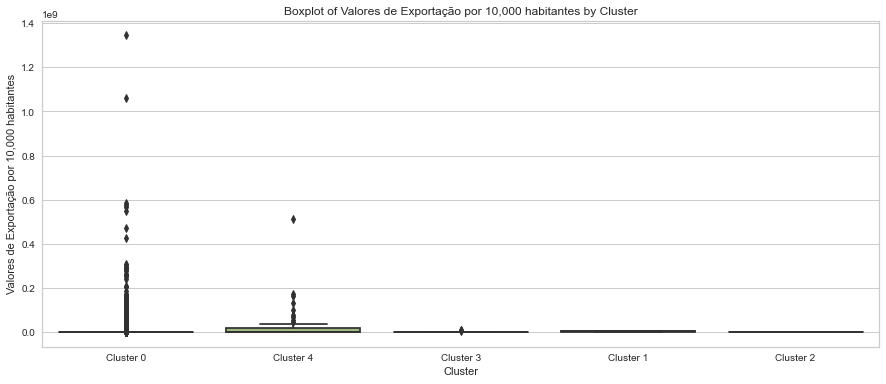

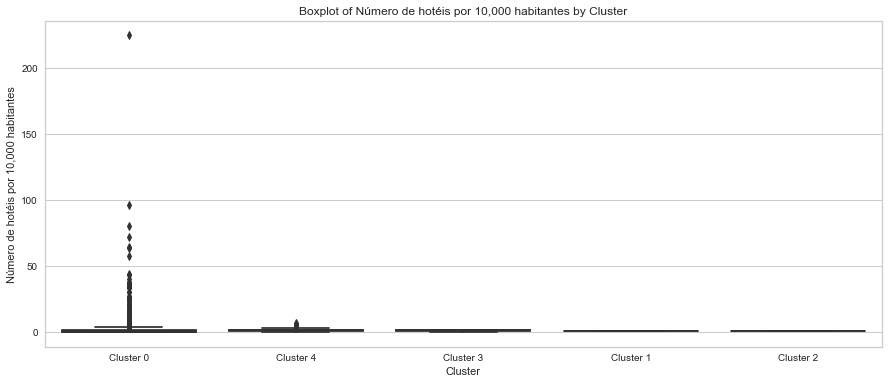

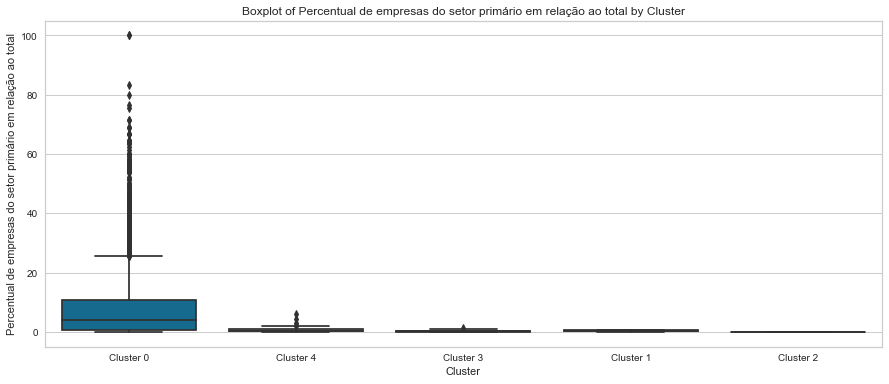

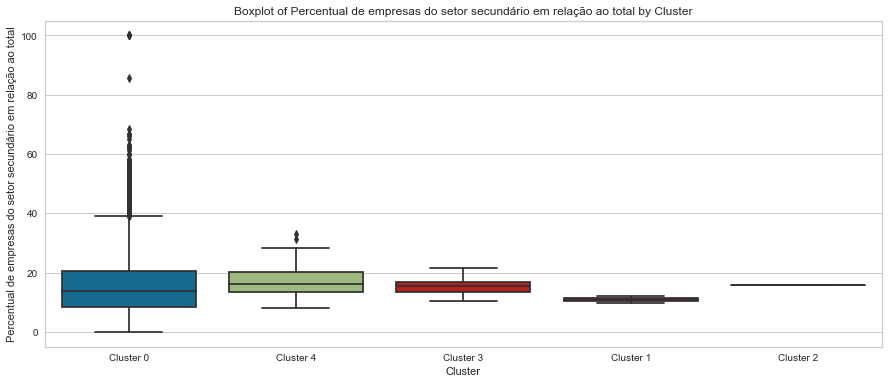

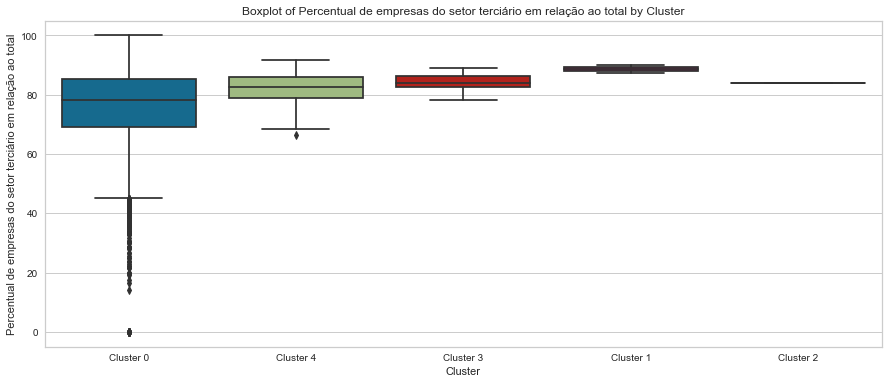

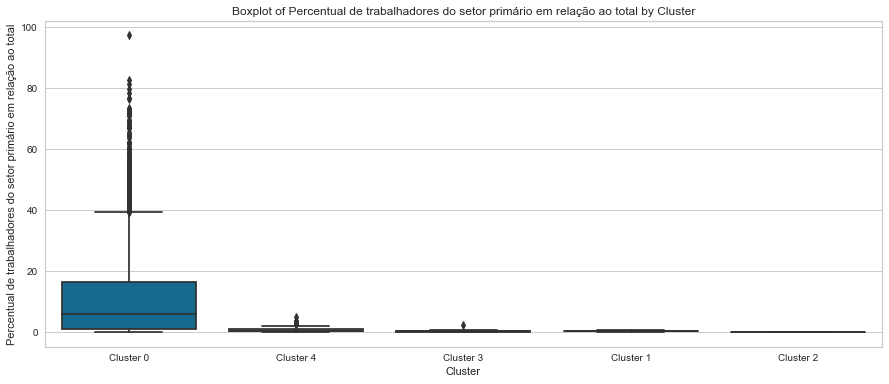

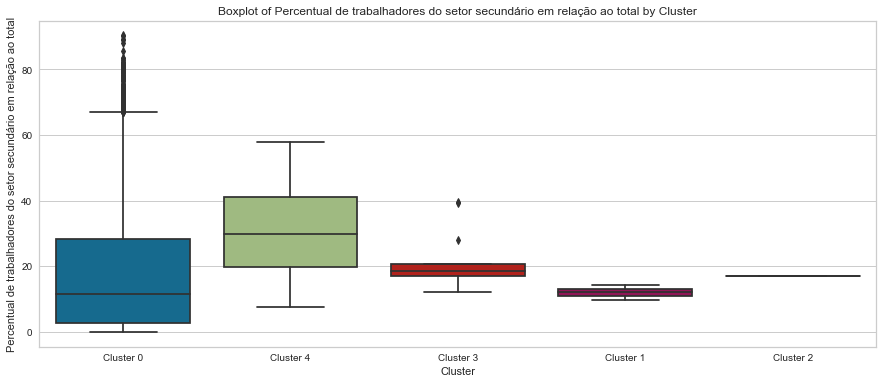

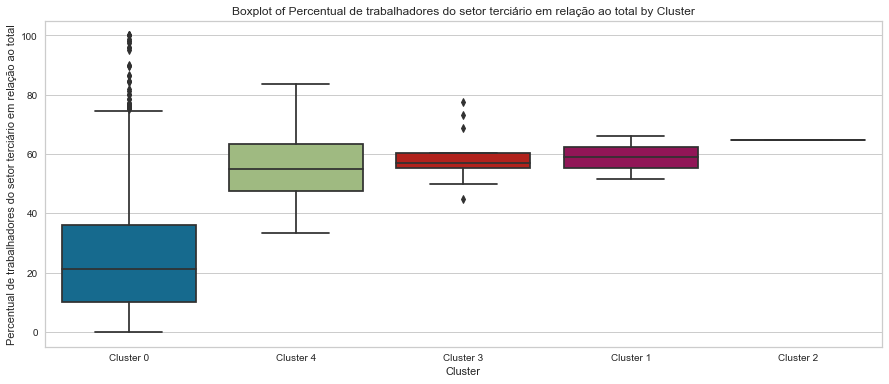

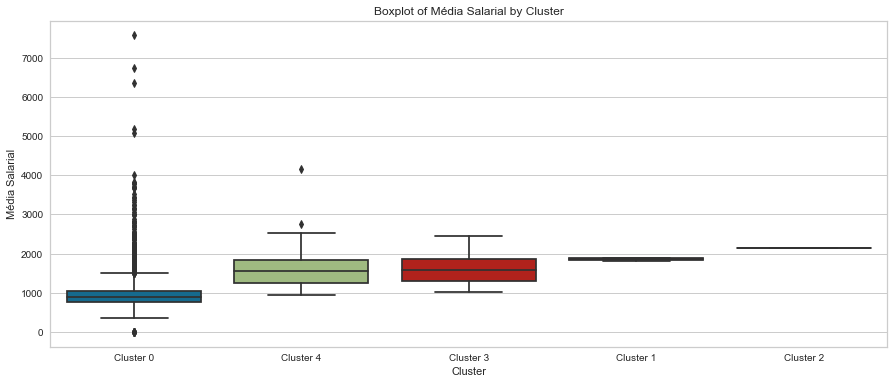

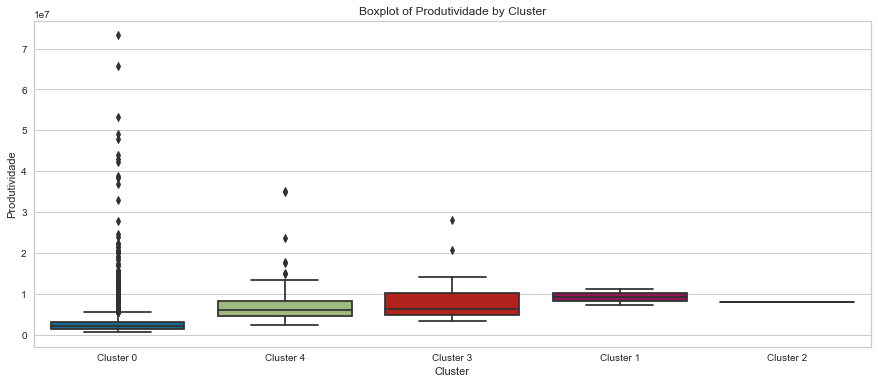

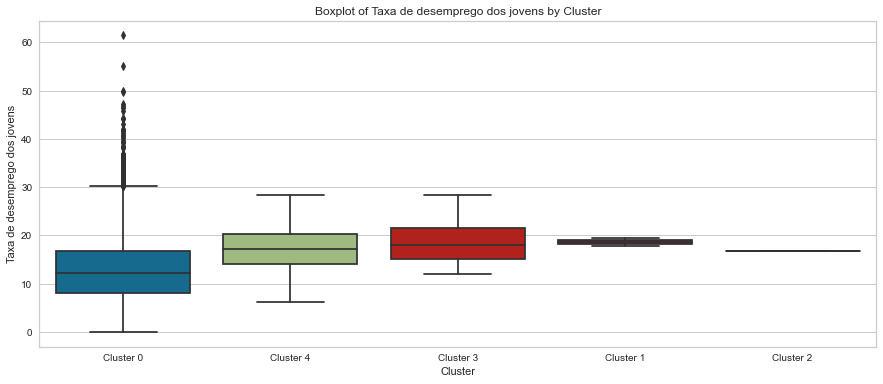

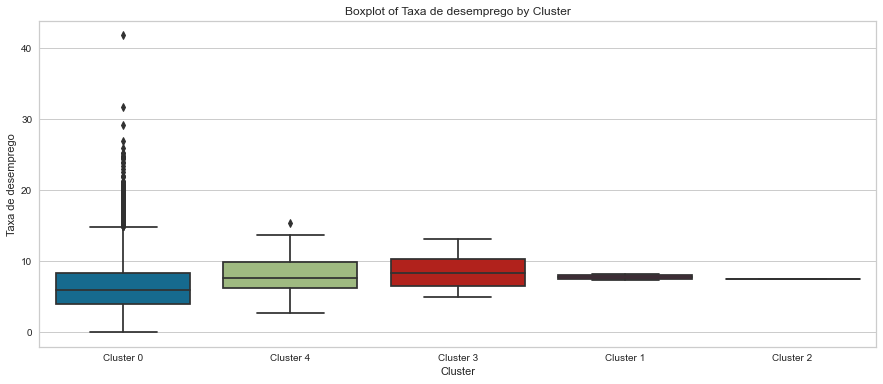

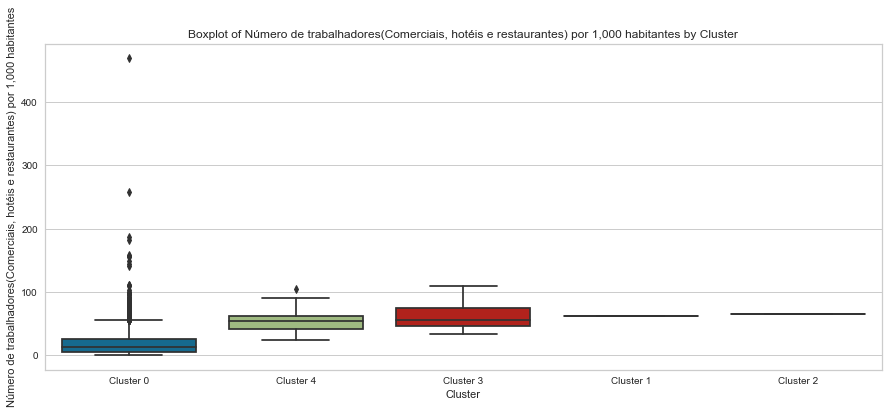

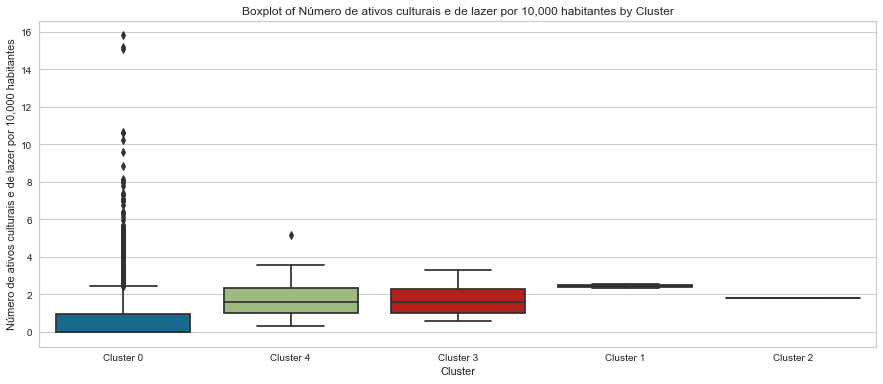

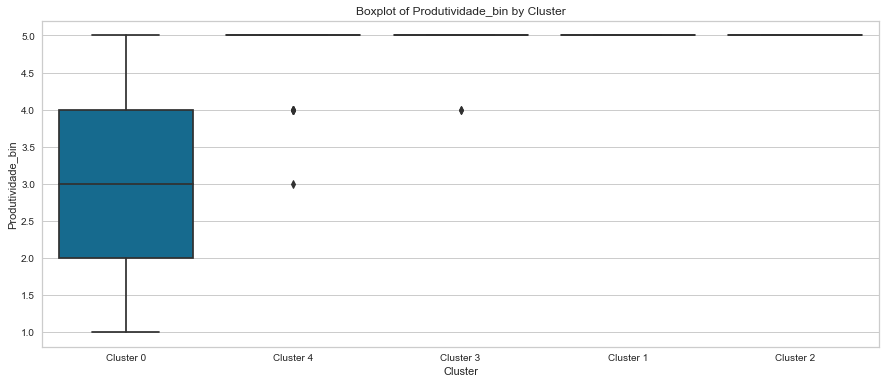

In [47]:
colunas = ['População residente', 'Densidade demográfica', 'Porcentagem de Jovens', 
           'Porcentagem de Ativos', 'Porcentagem de Idosos', 'Taxa de Urbanização', 
           'Taxa de Saneamento Básico', 'Ativos com Baixo Nível Educacional', 
           'Ativos com Médio Nível Educacional', 'Ativos com Alto Nível Educacional', 
           'Percentual de estrangeiros ao total de Trabalhadores', 'PIB Municipal', 
           'Estudantes Ensino primário', 'Estudantes Ensino secundário', 'Estudantes Ensino superior', 
           'Óbitos até 1 ano de idade por milhares de habitantes', 'Óbitos por milhares de habitantes', 
           'Nascidos por milhares de habitantes', 'Hospitais por milhares de habitantes', 
           'Médicos por milhares de habitantes', '% de pobres', 'IDH', 
           'Percentual de trabalhadores especializados', 'Valores de Importação por 10,000 habitantes', 
           'Valores de Exportação por 10,000 habitantes', 'Número de hotéis por 10,000 habitantes', 
           'Percentual de empresas do setor primário em relação ao total', 
           'Percentual de empresas do setor secundário em relação ao total', 
           'Percentual de empresas do setor terciário em relação ao total', 
           'Percentual de trabalhadores do setor primário em relação ao total', 
           'Percentual de trabalhadores do setor secundário em relação ao total', 
           'Percentual de trabalhadores do setor terciário em relação ao total', 'Média Salarial', 
           'Produtividade', 'Taxa de desemprego dos jovens', 'Taxa de desemprego', 
           'Número de trabalhadores(Comerciais, hotéis e restaurantes) por 1,000 habitantes', 
           'Número de ativos culturais e de lazer por 10,000 habitantes', 'Produtividade_bin']

for col in colunas:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x='Cluster', y=col, data=kmeans_pred)
    plt.title('Boxplot of {} by Cluster'.format(col))
    plt.show()

